**PROYECTO EXPEDIA OPEN DATA II**

Expedia está interesada en predecir qué grupo de hoteles va a reservar un usuario. (GRUPO DE HOTELES = HOTEL_CLUSTER)

**site_name** (Identificación del punto de venta de Expedia)                                                                                                     
**posa_continent** (ID del continente asociado)                                                                                                
**user_location_country** (ID del país donde está el cliente)                                                                               
**user_location_region** (ID de la región donde está el cliente)                                                                        
**user_location_city** (ID de la ciudad donde está el cliente)                                                                                
**orig_destination_distance** (Distancia entre el cliente y el hotel en el momento de la búsqueda)                                             
**user_id** (ID del usuario)                                                                                                           
**is_mobile** (1-cuando se conecto desde el móvil)                                                                                      
**is_package** (1-si la reserva se generó como parte de un paquete (con vuelo))                                                                   
**channel** (canal de marketing)                                                                                                                  
**srch_ci** (cadena de fecha de registro)                                                                                                         
**srch_co** (cadena de fecha de pago)                                                                                                             
**srch_adults_cnt** (número de adultos especificados en la habitación)                                                                           
**srch_children_cnt** (número de niños (ocupación extra) especificados en la habitación)                                                  
**srch_rm_cnt** (número de habitaciones especificados en la búsqueda)                                                                                
**srch_destination_id** (ID del destino donde se realizó la busqueda del hotel)                                                                   
**srch_destination_type_id** (ID del tipo de destino)                                                                                             
**hotel_continent** (continente del hotel)                                                                                                       
**hotel_country** (país del hotel)                                                                                                       
**hotel_market** (mercado del hotel)                                                                                                            
**is_booking** (1- si es una reserva, 0- si es un click)                                                                                     
**cnt** (número de eventos similares en el contexto de la misma sesión de usuario)                                                       
**hotel_cluster** (ID de un grupo de hoteles)

Una vez que hemos creado un nuevo .csv con el dataSet resultante del semestre pasado, es decir, con menos cantidad de valores nulos que en un primer momento. Pasamos en primer lugar a importar nuestro dataSet con la librería numpy como lo hicimos en el primer semestre y, para verificar que la operación que habíamos hecho de crear un nuevo .csv era correcta 

Lo primero de todo es cargar las librerías necesarias para realizar las operaciones relacionadas con el primer semestre

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import *

A continuación, cargamos el dataSet

In [2]:
myData = pd.read_csv('expediaBueno.csv')
myData.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,date,month-year,month,year,periodo,Categoría
0,101940,2013-01-14 09:57:25,2,3,66,442,35390,799.9374,397128,0,...,4.0,8.0,110.0,83.0,2013-01-14,2013-01,1,2013,1,9
1,142252,2013-01-29 12:20:45,37,1,69,908,28451,NaN,552136,0,...,6.0,31.0,155.0,42.0,2013-01-29,2013-01,1,2013,1,4
2,142253,2013-01-29 12:30:08,37,1,69,908,28451,NaN,552136,0,...,6.0,31.0,155.0,15.0,2013-01-29,2013-01,1,2013,1,4
3,142254,2013-01-29 12:30:48,37,1,69,908,28451,NaN,552136,0,...,6.0,31.0,155.0,5.0,2013-01-29,2013-01,1,2013,1,4
4,142255,2013-01-29 13:11:18,37,1,69,908,28451,NaN,552136,0,...,6.0,68.0,275.0,46.0,2013-01-29,2013-01,1,2013,1,4


Comprobamos que se había guardado bien el dataSet resultante del primer semestre. Y que el número de valores nulos es el adecuado

In [3]:
myData.isnull().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    84896
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
date                             0
month-year                       0
month                            0
year                             0
periodo                          0
Categoría           

Una observación muy importante que vemos es que se ha creado una nueva columna con el ID de cada fila

**PYSPARK**

A continuación, empezamos con pyspark. Lo primero de todo es importar todo aquello que vayamos a necesitar a lo largo del trabajo y crear una sesión. 

In [4]:
import findspark
findspark.init()

from pyspark import SparkContext
sc=SparkContext(master="local[3]")
print(sc)

<SparkContext master=local[3] appName=pyspark-shell>


In [5]:
import findspark
findspark.init()
findspark.find()
from pyspark import SparkContext

In [6]:
from pyspark.sql.session import *
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [7]:
from pyspark.sql.session import SparkSession
spark = SparkSession(sc)

Cargamos nuestro dataSet mediante la librería **spark**

In [8]:
Expedia_DF = spark.read.csv('expediaBueno.csv', header='true', inferSchema='true', sep=',')

Comprobamos que se nos ha cargado bien el dataSet imprimiendo la primera fila de nuestro dataSet y viendo el número de columnas totales que tiene nuestro dataSet

In [9]:
Expedia_DF.head(1)

[Row(_c0=101940, date_time=datetime.datetime(2013, 1, 14, 9, 57, 25), site_name=2, posa_continent=3, user_location_country=66, user_location_region=442, user_location_city=35390, orig_destination_distance=799.9374, user_id=397128, is_mobile=0, is_package=1, channel=0, srch_adults_cnt=3, srch_children_cnt=2, srch_rm_cnt=1.0, srch_destination_id=8791.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=4.0, hotel_country=8.0, hotel_market=110.0, hotel_cluster=83.0, date=datetime.datetime(2013, 1, 14, 0, 0), month-year='2013-01', month=1, year=2013, periodo=1, Categoría=9)]

In [10]:
Expedia_DF.count()

243444

Como podemos observar en el código anterior, la primera columna no tiene nombre, decidimos imprimir todas las columnas para comprobar que es cierto que no tiene nombre dicha columna

In [11]:
Expedia_DF.columns

['_c0',
 'date_time',
 'site_name',
 'posa_continent',
 'user_location_country',
 'user_location_region',
 'user_location_city',
 'orig_destination_distance',
 'user_id',
 'is_mobile',
 'is_package',
 'channel',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'is_booking',
 'cnt',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'hotel_cluster',
 'date',
 'month-year',
 'month',
 'year',
 'periodo',
 'Categoría']

A continuación, decidimos imprimir esa columna para comprobar cual era el nombre de dicha columna  y que valores tenía ya que era nueva y no la teníamos en nuestro anterior dataSet. 

In [12]:
Expedia_DF.select('_c0').show()

+------+
|   _c0|
+------+
|101940|
|142252|
|142253|
|142254|
|142255|
|142256|
|142257|
|142258|
| 22936|
| 22937|
|142251|
| 22938|
| 22940|
| 22941|
| 22942|
| 22943|
|193539|
| 92242|
| 92241|
| 92240|
+------+
only showing top 20 rows



Tras un amplio debate y una investigación decidimos cambiarle de nombre a la columna y llamarle ID_Reserva. La creación de esta nueva columna es porque al guardarlo en un .csv se crea directamente una nueva columna con el ID

In [13]:
Expedia_DF=Expedia_DF.withColumnRenamed('_c0','ID_Reserva')

Imprimimos de nuevo la primera fila de nuestro dataSet para comprobar que se había cambiado correctamente el nombre de la columna

In [14]:
Expedia_DF.head(1)

[Row(ID_Reserva=101940, date_time=datetime.datetime(2013, 1, 14, 9, 57, 25), site_name=2, posa_continent=3, user_location_country=66, user_location_region=442, user_location_city=35390, orig_destination_distance=799.9374, user_id=397128, is_mobile=0, is_package=1, channel=0, srch_adults_cnt=3, srch_children_cnt=2, srch_rm_cnt=1.0, srch_destination_id=8791.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=4.0, hotel_country=8.0, hotel_market=110.0, hotel_cluster=83.0, date=datetime.datetime(2013, 1, 14, 0, 0), month-year='2013-01', month=1, year=2013, periodo=1, Categoría=9)]

Con esta última comprobación. Podemos observar como ya tenemos nuestro dataSet con todas sus columnas correctas.

**PARTICIÓN DEL DATASET**
Ahora dividimos el en dos subdatasets, uno contenedor de todos los valores nulos y otro que no contiene ningún nulo
COn el objetivo de, más avanzados en el noteebok poder predecir dichos nulos.

**NUEVO DATASET SIN NULOS**

In [133]:
df_na = myData.dropna()

In [134]:
df_na.count()

Unnamed: 0                   158548
date_time                    158548
site_name                    158548
posa_continent               158548
user_location_country        158548
user_location_region         158548
user_location_city           158548
orig_destination_distance    158548
user_id                      158548
is_mobile                    158548
is_package                   158548
channel                      158548
srch_adults_cnt              158548
srch_children_cnt            158548
srch_rm_cnt                  158548
srch_destination_id          158548
srch_destination_type_id     158548
is_booking                   158548
cnt                          158548
hotel_continent              158548
hotel_country                158548
hotel_market                 158548
hotel_cluster                158548
date                         158548
month-year                   158548
month                        158548
year                         158548
periodo                     

In [135]:
df_na.isnull().sum()

Unnamed: 0                   0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
date                         0
month-year                   0
month                        0
year                         0
periodo                      0
Categoría                    0
dtype: int64

In [136]:
dfNaN=myData[pd.isnull(myData).any(axis=1)]

In [137]:
dfNaN.count()

Unnamed: 0                   84896
date_time                    84896
site_name                    84896
posa_continent               84896
user_location_country        84896
user_location_region         84896
user_location_city           84896
orig_destination_distance        0
user_id                      84896
is_mobile                    84896
is_package                   84896
channel                      84896
srch_adults_cnt              84896
srch_children_cnt            84896
srch_rm_cnt                  84896
srch_destination_id          84896
srch_destination_type_id     84896
is_booking                   84896
cnt                          84896
hotel_continent              84896
hotel_country                84896
hotel_market                 84896
hotel_cluster                84896
date                         84896
month-year                   84896
month                        84896
year                         84896
periodo                      84896
Categoría           

In [138]:
dfNaN.isnull().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    84896
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
date                             0
month-year                       0
month                            0
year                             0
periodo                          0
Categoría           

**Guardamos los datasets en csv para más tarde trabajar con ellos en pyspark**

In [139]:
# Guarda datos en CSV:
df_na.to_csv('dfNoNulos.csv', index=False)

In [140]:
# Guarda datos en CSV:
dfNaN.to_csv('dfNULOS.csv', index=False)

**PYSPARK PARA NUEVO DATASET**

In [141]:
Expedia_DFNoNulos = spark.read.csv('dfNoNulos.csv', header='true', inferSchema='true', sep=',')

In [142]:
Expedia_DFNULOS = spark.read.csv('dfNULOS.csv', header='true', inferSchema='true', sep=',')

Comprobamos que se nos ha cargado bien el dataSet imprimiendo la primera fila de nuestro dataSet y viendo el número de columnas totales que tiene nuestro dataSet

In [143]:
Expedia_DFNoNulos.head(1)

[Row(Unnamed: 0=101940, date_time=datetime.datetime(2013, 1, 14, 9, 57, 25), site_name=2, posa_continent=3, user_location_country=66, user_location_region=442, user_location_city=35390, orig_destination_distance=799.9374, user_id=397128, is_mobile=0, is_package=1, channel=0, srch_adults_cnt=3, srch_children_cnt=2, srch_rm_cnt=1.0, srch_destination_id=8791.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=4.0, hotel_country=8.0, hotel_market=110.0, hotel_cluster=83.0, date=datetime.datetime(2013, 1, 14, 0, 0), month-year='2013-01', month=1, year=2013, periodo=1, Categoría=9)]

In [144]:
Expedia_DFNULOS.head(1)

[Row(Unnamed: 0=142252, date_time=datetime.datetime(2013, 1, 29, 12, 20, 45), site_name=37, posa_continent=1, user_location_country=69, user_location_region=908, user_location_city=28451, orig_destination_distance=None, user_id=552136, is_mobile=0, is_package=0, channel=9, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0, srch_destination_id=8238.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=6.0, hotel_country=31.0, hotel_market=155.0, hotel_cluster=42.0, date=datetime.datetime(2013, 1, 29, 0, 0), month-year='2013-01', month=1, year=2013, periodo=1, Categoría=4)]

In [118]:
Expedia_DFNoNulos.count()

158548

In [119]:
Expedia_DFNULOS.count()

84896

**ESQUEMA**

El siguiente paso que dimos fue pasar a ver cual es la estructura predeterminada que tiene nuestro dataSet y ver si tenemos que corregir alguna cosa. Para ello, lo primero que hicimos fue imprimir el esquema que venía prederteminado con el dataSet

In [15]:
Expedia_DF.schema

StructType(List(StructField(ID_Reserva,IntegerType,true),StructField(date_time,TimestampType,true),StructField(site_name,IntegerType,true),StructField(posa_continent,IntegerType,true),StructField(user_location_country,IntegerType,true),StructField(user_location_region,IntegerType,true),StructField(user_location_city,IntegerType,true),StructField(orig_destination_distance,DoubleType,true),StructField(user_id,IntegerType,true),StructField(is_mobile,IntegerType,true),StructField(is_package,IntegerType,true),StructField(channel,IntegerType,true),StructField(srch_adults_cnt,IntegerType,true),StructField(srch_children_cnt,IntegerType,true),StructField(srch_rm_cnt,DoubleType,true),StructField(srch_destination_id,DoubleType,true),StructField(srch_destination_type_id,DoubleType,true),StructField(is_booking,DoubleType,true),StructField(cnt,DoubleType,true),StructField(hotel_continent,DoubleType,true),StructField(hotel_country,DoubleType,true),StructField(hotel_market,DoubleType,true),StructField

Una vez impreso el esquema decidimos realizar algún cambio en ella:

La columana 'is_booking' la cambiamos ya que en la estructura predetermiada aparece que es de tipo Double, nosotros al ver que dicha columna era igual que las columnas 'is_package' e 'is_mobile' (todas ellas son binarias) y estas últimas estaban predetermiandas como de tipo Integer, decidimos ponerlas todas del mismo tipo, es decir, Integer.

A continuación imprimimos las columas por las que nos hemos guiado para cambiar el tipo de dato en el esquema y para poder verlo de una manera más visual.

In [16]:
Expedia_DF.select("is_booking","is_package","is_mobile").show()

+----------+----------+---------+
|is_booking|is_package|is_mobile|
+----------+----------+---------+
|       0.0|         1|        0|
|       0.0|         0|        0|
|       0.0|         0|        0|
|       0.0|         0|        0|
|       0.0|         1|        0|
|       1.0|         1|        0|
|       0.0|         0|        0|
|       0.0|         0|        0|
|       0.0|         1|        0|
|       0.0|         1|        0|
|       0.0|         0|        0|
|       0.0|         1|        0|
|       0.0|         1|        0|
|       0.0|         1|        0|
|       0.0|         1|        0|
|       1.0|         1|        0|
|       0.0|         0|        0|
|       0.0|         0|        0|
|       1.0|         0|        0|
|       0.0|         0|        0|
+----------+----------+---------+
only showing top 20 rows



Una vez que vimos necesario el cambio propuesto anteriormente, creamos un nuevo esquema con dicho cambio.

In [17]:
# El esquema se codifica en un string, usando StructType definimos el esquema usando varios pyspark.sql.types
Estructura = StructType([
    StructField("ID_Reserva", IntegerType()),  
    StructField("date_time", TimestampType()),    
    StructField("site_name", IntegerType()),
    StructField("posa_continent", IntegerType()),
    StructField("user_location_country", IntegerType()),
    StructField("user_location_region", IntegerType()),
    StructField("user_location_city", IntegerType()),
    StructField("orig_destination_distance", DoubleType()),
    StructField("user_id", IntegerType()),
    StructField("is_mobile", DoubleType()),
    StructField("is_package", DoubleType()),
    StructField("channel", IntegerType()),
    StructField("srch_adults_cnt", IntegerType()),
    StructField("srch_children_cnt", IntegerType()),
    StructField("srch_rm_cnt", DoubleType()),
    StructField("srch_destination_id", DoubleType()),
    StructField("srch_destination_type_id", DoubleType()),
    StructField("is_booking", DoubleType()),
    StructField("cnt", DoubleType()),
    StructField("hotel_continent", DoubleType()),
    StructField("hotel_country", DoubleType()),
    StructField("hotel_market", DoubleType()),
    StructField("hotel_cluster", DoubleType()),
    StructField("date", TimestampType()),
    StructField("month-year", StringType()),
    StructField("month", IntegerType()),
    StructField("year", IntegerType()),
    StructField("periodo", IntegerType()),
    StructField("Categoría", IntegerType())
])

Indicamos a nuestro dataSet que queremos que los valores sigan el esquema que hemos formado nosotros y no el predeterminado

In [18]:
Expedia_DF = spark.read.csv('expediaBueno.csv', header='true', inferSchema='false', schema=Estructura, sep=',')

Imprimimos de nuevo el esquema para comprobar que se han realizado correctamente los cambios

In [19]:
Expedia_DF.schema

StructType(List(StructField(ID_Reserva,IntegerType,true),StructField(date_time,TimestampType,true),StructField(site_name,IntegerType,true),StructField(posa_continent,IntegerType,true),StructField(user_location_country,IntegerType,true),StructField(user_location_region,IntegerType,true),StructField(user_location_city,IntegerType,true),StructField(orig_destination_distance,DoubleType,true),StructField(user_id,IntegerType,true),StructField(is_mobile,DoubleType,true),StructField(is_package,DoubleType,true),StructField(channel,IntegerType,true),StructField(srch_adults_cnt,IntegerType,true),StructField(srch_children_cnt,IntegerType,true),StructField(srch_rm_cnt,DoubleType,true),StructField(srch_destination_id,DoubleType,true),StructField(srch_destination_type_id,DoubleType,true),StructField(is_booking,DoubleType,true),StructField(cnt,DoubleType,true),StructField(hotel_continent,DoubleType,true),StructField(hotel_country,DoubleType,true),StructField(hotel_market,DoubleType,true),StructField(h

Otra manera diferente de comprobar que el esquema se ha cambiado correctamente

In [20]:
Expedia_DF.printSchema()

root
 |-- ID_Reserva: integer (nullable = true)
 |-- date_time: timestamp (nullable = true)
 |-- site_name: integer (nullable = true)
 |-- posa_continent: integer (nullable = true)
 |-- user_location_country: integer (nullable = true)
 |-- user_location_region: integer (nullable = true)
 |-- user_location_city: integer (nullable = true)
 |-- orig_destination_distance: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- is_mobile: double (nullable = true)
 |-- is_package: double (nullable = true)
 |-- channel: integer (nullable = true)
 |-- srch_adults_cnt: integer (nullable = true)
 |-- srch_children_cnt: integer (nullable = true)
 |-- srch_rm_cnt: double (nullable = true)
 |-- srch_destination_id: double (nullable = true)
 |-- srch_destination_type_id: double (nullable = true)
 |-- is_booking: double (nullable = true)
 |-- cnt: double (nullable = true)
 |-- hotel_continent: double (nullable = true)
 |-- hotel_country: double (nullable = true)
 |-- hotel_market: doubl

Un nueva manera de ver que no ha habido ningún problema 

In [21]:
Expedia_DF.head(1)

[Row(ID_Reserva=101940, date_time=datetime.datetime(2013, 1, 14, 9, 57, 25), site_name=2, posa_continent=3, user_location_country=66, user_location_region=442, user_location_city=35390, orig_destination_distance=799.9374, user_id=397128, is_mobile=0.0, is_package=1.0, channel=0, srch_adults_cnt=3, srch_children_cnt=2, srch_rm_cnt=1.0, srch_destination_id=8791.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=4.0, hotel_country=8.0, hotel_market=110.0, hotel_cluster=83.0, date=datetime.datetime(2013, 1, 14, 0, 0), month-year='2013-01', month=1, year=2013, periodo=1, Categoría=9)]

La última comprobación que hacemos es imprimir la columna que hemos decidido cambiar junto con las otras dos columnas que nos han ayudado a tomar dicha decisión

In [22]:
Expedia_DF.select("is_booking","is_package","is_mobile").show()

+----------+----------+---------+
|is_booking|is_package|is_mobile|
+----------+----------+---------+
|       0.0|       1.0|      0.0|
|       0.0|       0.0|      0.0|
|       0.0|       0.0|      0.0|
|       0.0|       0.0|      0.0|
|       0.0|       1.0|      0.0|
|       1.0|       1.0|      0.0|
|       0.0|       0.0|      0.0|
|       0.0|       0.0|      0.0|
|       0.0|       1.0|      0.0|
|       0.0|       1.0|      0.0|
|       0.0|       0.0|      0.0|
|       0.0|       1.0|      0.0|
|       0.0|       1.0|      0.0|
|       0.0|       1.0|      0.0|
|       0.0|       1.0|      0.0|
|       1.0|       1.0|      0.0|
|       0.0|       0.0|      0.0|
|       0.0|       0.0|      0.0|
|       1.0|       0.0|      0.0|
|       0.0|       0.0|      0.0|
+----------+----------+---------+
only showing top 20 rows



Por último, visualizamos el resultado final una vez que hemos comprobado que todo está correcto

In [23]:
Expedia_DF.show()

+----------+-------------------+---------+--------------+---------------------+--------------------+------------------+-------------------------+-------+---------+----------+-------+---------------+-----------------+-----------+-------------------+------------------------+----------+---+---------------+-------------+------------+-------------+-------------------+----------+-----+----+-------+---------+
|ID_Reserva|          date_time|site_name|posa_continent|user_location_country|user_location_region|user_location_city|orig_destination_distance|user_id|is_mobile|is_package|channel|srch_adults_cnt|srch_children_cnt|srch_rm_cnt|srch_destination_id|srch_destination_type_id|is_booking|cnt|hotel_continent|hotel_country|hotel_market|hotel_cluster|               date|month-year|month|year|periodo|Categoría|
+----------+-------------------+---------+--------------+---------------------+--------------------+------------------+-------------------------+-------+---------+----------+-------+------

**USO DE SQL EN NUESTRO DATASET**

El siguiente código es muy importante para poder operar con sql

In [24]:
Expedia_DF.createOrReplaceTempView("Expedia_tb")

El siguiente código nos cuenta el número de filas que tiene nuestro dataSet mediante sql, como podemos comprobar sale el mismo número que si lo hacemos sin utilizar sql

In [25]:
spark.sql("select count(*) from Expedia_tb").collect()

[Row(count(1)=243444)]

In [26]:
Expedia_DF.count()

243444

El siguiente código Me calcula mediante sql el número de veces que se repite cada valor de 'hotel_cluster'

In [28]:
spark.sql("select count(*), hotel_cluster from Expedia_tb group by hotel_cluster").collect()

[Row(count(1)=3345, hotel_cluster=70.0),
 Row(count(1)=2207, hotel_cluster=8.0),
 Row(count(1)=1722, hotel_cluster=67.0),
 Row(count(1)=2299, hotel_cluster=69.0),
 Row(count(1)=2425, hotel_cluster=0.0),
 Row(count(1)=1693, hotel_cluster=7.0),
 Row(count(1)=675, hotel_cluster=88.0),
 Row(count(1)=1534, hotel_cluster=49.0),
 Row(count(1)=3805, hotel_cluster=98.0),
 Row(count(1)=2434, hotel_cluster=29.0),
 Row(count(1)=4645, hotel_cluster=64.0),
 Row(count(1)=1115, hotel_cluster=75.0),
 Row(count(1)=2844, hotel_cluster=47.0),
 Row(count(1)=3742, hotel_cluster=42.0),
 Row(count(1)=1936, hotel_cluster=44.0),
 Row(count(1)=2442, hotel_cluster=96.0),
 Row(count(1)=871, hotel_cluster=35.0),
 Row(count(1)=3182, hotel_cluster=62.0),
 Row(count(1)=3496, hotel_cluster=18.0),
 Row(count(1)=1495, hotel_cluster=86.0),
 Row(count(1)=1507, hotel_cluster=80.0),
 Row(count(1)=2179, hotel_cluster=39.0),
 Row(count(1)=2867, hotel_cluster=1.0),
 Row(count(1)=1818, hotel_cluster=94.0),
 Row(count(1)=3299, ho

PODEMOS OBSERVAR COMO LOS DATOS NO ESTÁN DISTRIBUIDOS CORRECTAMENTE (MÁS TARDE CORREGIREMOS ESTO GRACIAS A CATEGORIZAR LAS VARIABLES)

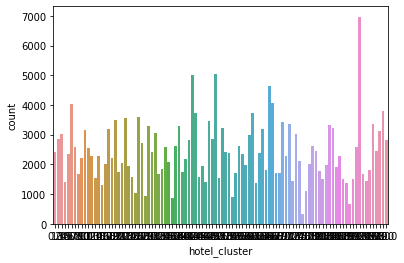

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations
sns.countplot(x='hotel_cluster', data=myData)

El siguiente código me calcula mediante sql el número de valores únicos que tiene cada columna

In [29]:
for col in Expedia_DF:
 col_count = Expedia_DF.select(col).distinct().count()
 print('variable {0} , count {1}'.format(col, col_count))

variable Column<b'ID_Reserva'> , count 243444
variable Column<b'date_time'> , count 242629
variable Column<b'site_name'> , count 42
variable Column<b'posa_continent'> , count 5
variable Column<b'user_location_country'> , count 148
variable Column<b'user_location_region'> , count 609
variable Column<b'user_location_city'> , count 6234
variable Column<b'orig_destination_distance'> , count 105271
variable Column<b'user_id'> , count 8186
variable Column<b'is_mobile'> , count 2
variable Column<b'is_package'> , count 2
variable Column<b'channel'> , count 11
variable Column<b'srch_adults_cnt'> , count 10
variable Column<b'srch_children_cnt'> , count 10
variable Column<b'srch_rm_cnt'> , count 9
variable Column<b'srch_destination_id'> , count 8773
variable Column<b'srch_destination_type_id'> , count 8
variable Column<b'is_booking'> , count 2
variable Column<b'cnt'> , count 36
variable Column<b'hotel_continent'> , count 6
variable Column<b'hotel_country'> , count 178
variable Column<b'hotel_mark

El siguiente código nos crea una columna nueva. En este caso la columna que hemos decidido crear se llama 'Viajeros' y nos indica el número total de personas que viajan, es decir, la suma de niños y adultos.

In [30]:
Expedia_DF=Expedia_DF.withColumn("Viajeros",Expedia_DF['srch_adults_cnt']+ Expedia_DF['srch_children_cnt'])

Imprimimos la columna que hemos creado, para ver que estamos en lo correcto

In [31]:
Expedia_DF.select("Viajeros").show()

+--------+
|Viajeros|
+--------+
|       5|
|       2|
|       2|
|       2|
|       2|
|       2|
|       3|
|       2|
|       1|
|       1|
|       2|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       2|
|       3|
|       3|
+--------+
only showing top 20 rows



**DENTRO DE SQL HEMOS HECHO DIVIDIÓN Y CRUCE DE TABLAS**

A continuación, vamos a realizar un cruce con dos tablas. En nuestro caso, al no tener dos tablas diferentes, el primer paso que tuvimos que realizar fue crearlas. Para ello, dividimos todas las columnas que teníamos en dos y pusimos como columna común 'hotel_cluster'

Lo primero que hacemos es crear la partición, es decir, seleccionar las columnas que van a formar parte de la primera tabla, como hemos dicho anteriormente, una de las columnas que debe aparecer es 'hotel_cluster'

In [32]:
PartitionA = Expedia_DF.select('hotel_cluster','date_time','site_name','posa_continent','user_location_country','user_location_region','user_location_city','orig_destination_distance','user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt')

Imprimimos para visualizarla mejor, el resultado final de las columnas que hemos seleccionado

In [33]:
PartitionA.show()

+-------------+-------------------+---------+--------------+---------------------+--------------------+------------------+-------------------------+-------+---------+----------+-------+---------------+-----------------+-----------+
|hotel_cluster|          date_time|site_name|posa_continent|user_location_country|user_location_region|user_location_city|orig_destination_distance|user_id|is_mobile|is_package|channel|srch_adults_cnt|srch_children_cnt|srch_rm_cnt|
+-------------+-------------------+---------+--------------+---------------------+--------------------+------------------+-------------------------+-------+---------+----------+-------+---------------+-----------------+-----------+
|         83.0|2013-01-14 09:57:25|        2|             3|                   66|                 442|             35390|                 799.9374| 397128|      0.0|       1.0|      0|              3|                2|        1.0|
|         42.0|2013-01-29 12:20:45|       37|             1|            

Vemos de que tipo es la partición que hemos creado

In [34]:
type(PartitionA)

pyspark.sql.dataframe.DataFrame

Como el tipo con el que hemos creado la partición era un dataFrame, decidimos cambiarlo a tabla con el siguiente código:

In [35]:
PartitionA.createOrReplaceTempView("myTablaA")

Una vez que ya tenemos creada una tabla con un menor número de columnas que la original. Decidimos escoger un número determinado de filas. Es decir, crearle una condición. En nuestro caso, la condición que hemos excogido es que los adultos que viajen sean menor que 4 y los niños que viejen también sean nemos de 4 independientemente de la suma de ambos. Para realizar dicho calculo, hemos utilizado SQL

In [36]:
Filtro = spark.sql("select * from myTablaA where srch_adults_cnt < 4 AND srch_children_cnt < 4 ").collect()

Después de crear la condición mediante sql, imprimimos el resultado para comprobar que todo estaba correcto

In [37]:
Filtro

[Row(hotel_cluster=83.0, date_time=datetime.datetime(2013, 1, 14, 9, 57, 25), site_name=2, posa_continent=3, user_location_country=66, user_location_region=442, user_location_city=35390, orig_destination_distance=799.9374, user_id=397128, is_mobile=0.0, is_package=1.0, channel=0, srch_adults_cnt=3, srch_children_cnt=2, srch_rm_cnt=1.0),
 Row(hotel_cluster=42.0, date_time=datetime.datetime(2013, 1, 29, 12, 20, 45), site_name=37, posa_continent=1, user_location_country=69, user_location_region=908, user_location_city=28451, orig_destination_distance=None, user_id=552136, is_mobile=0.0, is_package=0.0, channel=9, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0),
 Row(hotel_cluster=15.0, date_time=datetime.datetime(2013, 1, 29, 12, 30, 8), site_name=37, posa_continent=1, user_location_country=69, user_location_region=908, user_location_city=28451, orig_destination_distance=None, user_id=552136, is_mobile=0.0, is_package=0.0, channel=9, srch_adults_cnt=2, srch_children_cnt=0, srch_r

Comprobamos que el Filtro que se nos ha creado es de tipo lista

In [38]:
type(Filtro)

list

Cambiamos la lista a dataFrame e imprimimos para comprobar que se ha cambiado correctamente, que no hay ningún problema en las columnas y que sigue teniendo valores.

In [39]:
Filtro_ds = spark.createDataFrame(Filtro)

In [40]:
type(Filtro_ds)

pyspark.sql.dataframe.DataFrame

In [41]:
Filtro_ds

DataFrame[hotel_cluster: double, date_time: timestamp, site_name: bigint, posa_continent: bigint, user_location_country: bigint, user_location_region: bigint, user_location_city: bigint, orig_destination_distance: double, user_id: bigint, is_mobile: double, is_package: double, channel: bigint, srch_adults_cnt: bigint, srch_children_cnt: bigint, srch_rm_cnt: double]

In [42]:
Filtro_ds.head(2)

[Row(hotel_cluster=83.0, date_time=datetime.datetime(2013, 1, 14, 9, 57, 25), site_name=2, posa_continent=3, user_location_country=66, user_location_region=442, user_location_city=35390, orig_destination_distance=799.9374, user_id=397128, is_mobile=0.0, is_package=1.0, channel=0, srch_adults_cnt=3, srch_children_cnt=2, srch_rm_cnt=1.0),
 Row(hotel_cluster=42.0, date_time=datetime.datetime(2013, 1, 29, 12, 20, 45), site_name=37, posa_continent=1, user_location_country=69, user_location_region=908, user_location_city=28451, orig_destination_distance=None, user_id=552136, is_mobile=0.0, is_package=0.0, channel=9, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0)]

La última operación que hacemos para tener terminada la primera tabla es pasar de datFrame a tabla

In [43]:
Filtro_ds.createOrReplaceTempView("myTablaAFiltro")

YA TENEMOS CREADA LA PRIMERA TABLA, ESTA GUARDADA BAJO EL NOMBRE 'myTablaFiltro' y que usaremos más tarde para hacer el cruce con la siguiente tabla que crearemos.

Ahora pasamos a realizar operaciones similares con la segunda tabla que vamos a crear. Lo primero que hacemos es seleccionar el resto de columnas de nuestro dataSet y la columna 'hotel_cluester' de nuevo

In [44]:
PartitionB = Expedia_DF.select('hotel_cluster','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','date','month-year','month','year','periodo','Categoría')

Imprimimos el resultado de las columnas seleccionadas para verlo de una manera más visual

In [45]:
PartitionB.show()

+-------------+-------------------+------------------------+----------+---+---------------+-------------+------------+-------------------+----------+-----+----+-------+---------+
|hotel_cluster|srch_destination_id|srch_destination_type_id|is_booking|cnt|hotel_continent|hotel_country|hotel_market|               date|month-year|month|year|periodo|Categoría|
+-------------+-------------------+------------------------+----------+---+---------------+-------------+------------+-------------------+----------+-----+----+-------+---------+
|         83.0|             8791.0|                     1.0|       0.0|1.0|            4.0|          8.0|       110.0|2013-01-14 00:00:00|   2013-01|    1|2013|      1|        9|
|         42.0|             8238.0|                     1.0|       0.0|1.0|            6.0|         31.0|       155.0|2013-01-29 00:00:00|   2013-01|    1|2013|      1|        4|
|         15.0|             8238.0|                     1.0|       0.0|1.0|            6.0|         31.0|

Vemos en que tipo se nos ha creado la partición

In [46]:
type(PartitionB)

pyspark.sql.dataframe.DataFrame

Como el tipo resultante es un dataFrame, decidimos cambiarlo a tabla con el siguiente código:

In [47]:
PartitionB.createOrReplaceTempView("myTablaB")

YA TENEMOS CREADA LA SEGUNDA TABLA, ESTÁ GUARDADA BAJO EL NOMBRE 'myTablaB'

El siguiente paso es el más IMPORTANTE dentro del apartado. En él hago un CRUCE DE TABLAS, es decir, dependiendo del número de user_location_country que tengo. Cuento cuantos hotel_cluster hay y lo imprimo por pantalla.

In [48]:
Comparar = spark.sql("select count(*), user_location_country from myTablaAFiltro T1 inner join myTablaB T2 on T1.hotel_cluster= T2.hotel_cluster group by user_location_country").collect()

In [49]:
Comparar

[Row(count(1)=584437, user_location_country=29),
 Row(count(1)=234621, user_location_country=26),
 Row(count(1)=61275, user_location_country=65),
 Row(count(1)=64469, user_location_country=191),
 Row(count(1)=24354, user_location_country=222),
 Row(count(1)=285280, user_location_country=19),
 Row(count(1)=26446, user_location_country=54),
 Row(count(1)=1496389, user_location_country=0),
 Row(count(1)=3440374, user_location_country=167),
 Row(count(1)=35609, user_location_country=155),
 Row(count(1)=1793764, user_location_country=198),
 Row(count(1)=285721, user_location_country=130),
 Row(count(1)=709743, user_location_country=196),
 Row(count(1)=9084157, user_location_country=77),
 Row(count(1)=10094, user_location_country=184),
 Row(count(1)=120325, user_location_country=34),
 Row(count(1)=94195, user_location_country=188),
 Row(count(1)=103578, user_location_country=228),
 Row(count(1)=912861, user_location_country=202),
 Row(count(1)=10818, user_location_country=126),
 Row(count(1)

## METODOLOGÍA CREACIÓN DE MODELOS PARA PREDECIR LA VARIABLE OBJETIVO HOTEL-CLUSTER

Aplicaremos dicho metodología para crear nuestros diferentes modelos. Dicha metodología consiste en; 
1. **-Primero** crearemos diferentes transformers
2. **-Segundo**, elegimos nuestro algoritmo a utilizar, es decir definimos nuestro estimator, 
3. **-Tercero**, creamos el pipeline
3. **-Tercero Parte 2**, creamos nuestro grid, implementamos el hippertunning
4. **-Cuarto**, dividimos el dataSet en dos, una parte la usaremos como entrenamiento de los datos y otra parte para testear.
5. **-Quinto** evaluamos el modelo que hemos creado para ver cómo de bien se predicen los datos


**REGRESIÓN LOGISTICA**

In [65]:
encoder1 = ft.OneHotEncoder(
    inputCol='hotel_cluster', 
    outputCol='hotel_clusterVEC')

In [66]:
assembler1 = VectorAssembler(
    inputCols=['site_name','posa_continent','user_location_country','user_location_region','user_location_city','user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','hotel_cluster','month','year','periodo', 'Categoría'] + \
    [encoder1.getOutputCol()],
   #,' [encoder2.getOutputCol()],
  #,'  [encoder3.getOutputCol()],
    outputCol="features")

In [68]:
Expedia_DF.head(1)

[Row(_c0=101940, date_time=datetime.datetime(2013, 1, 14, 9, 57, 25), site_name=2, posa_continent=3, user_location_country=66, user_location_region=442, user_location_city=35390, orig_destination_distance=799.9374, user_id=397128, is_mobile=0, is_package=1, channel=0, srch_adults_cnt=3, srch_children_cnt=2, srch_rm_cnt=1.0, srch_destination_id=8791.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=4.0, hotel_country=8.0, hotel_market=110.0, hotel_cluster=83.0, date=datetime.datetime(2013, 1, 14, 0, 0), month-year='2013-01', month=1, year=2013, periodo=1, Categoría=9)]

In [69]:
import pyspark.ml.classification as cl

logistic = cl.LogisticRegression(
    #class_weight="balanced",
    maxIter=10, 
    regParam=0.01, 
    labelCol='hotel_cluster')#columna de salida que yo quiero estimar

In [71]:
df_train, df_test = Expedia_DF \
    .randomSplit([0.7, 0.3], seed=666)

In [72]:
pipeline = Pipeline(stages=[encoder1, assembler1, logistic])

In [73]:
model = pipeline.fit(df_train)

In [74]:
test_model = model.transform(df_test)

In [75]:
test_model.take(2)

[Row(_c0=17, date_time=datetime.datetime(2014, 1, 24, 11, 52, 4), site_name=2, posa_continent=3, user_location_country=66, user_location_region=318, user_location_city=22418, orig_destination_distance=421.8551, user_id=756, is_mobile=0, is_package=1, channel=9, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0, srch_destination_id=8291.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=2.0, hotel_country=50.0, hotel_market=191.0, hotel_cluster=25.0, date=datetime.datetime(2014, 1, 24, 0, 0), month-year='2014-01', month=1, year=2014, periodo=1, Categoría=4, hotel_clusterVEC=SparseVector(99, {25: 1.0}), features=SparseVector(123, {0: 2.0, 1: 3.0, 2: 66.0, 3: 318.0, 4: 22418.0, 5: 756.0, 7: 1.0, 8: 9.0, 9: 2.0, 11: 1.0, 12: 8291.0, 13: 1.0, 15: 1.0, 16: 2.0, 17: 50.0, 18: 191.0, 19: 25.0, 20: 1.0, 21: 2014.0, 22: 1.0, 23: 4.0, 49: 1.0}), rawPrediction=DenseVector([8.0989, 8.3777, 8.2326, 1.2874, 7.9773, 8.7034, 8.1599, 7.3096, 7.9145, 8.1595, 8.1186, 7.8728, 6

In [84]:
print(evaluator.evaluate(test_model, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test_model, {evaluator.metricName: 'areaUnderPR'}))

0.3181832810896422
0.9884884487523358


In [9]:
import pyspark.sql.functions as func

In [77]:
import pyspark.ml.tuning as tune

In [78]:
grid = tune.ParamGridBuilder().addGrid(logistic.maxIter, [6, 10]).addGrid(logistic.regParam, [0.04, 0.03]).build()

In [79]:
import pyspark.ml.evaluation as ev
evaluator = ev.BinaryClassificationEvaluator(rawPredictionCol='probability', labelCol='hotel_cluster')

In [80]:
cv = tune.CrossValidator(estimator=logistic, estimatorParamMaps=grid, evaluator=evaluator,numFolds=2)

Lo que nos hace  el k-fold es que divide un conjunto de datos en k bloques 2 en nuestro caso. A continuación, considera uno de ellos como conjunto de validación y el resto como conjunto de entrenamiento, devolviendo las k combinaciones posibles (la primera combinación es la que considera el primer bloque como conjunto de validación y el resto como conjunto de entrenamiento, la segunda es la que considera el segundo bloque como conjunto de validación y el resto como conjunto de entrenamiento, etc.).

In [82]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[encoder1, assembler1])
data_transformer = pipeline.fit(df_train)

In [83]:
cvModel = cv.fit(data_transformer.transform(df_train))

In [ ]:
data_train = data_transformer.transform(df_test)
results = cvModel.transform(data_train)

In [76]:
import pyspark.ml.evaluation as ev
print(evaluator.evaluate(results, {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(results, {evaluator.metricName: 'areaUnderPR'}))

0.3612153312303975
0.9897574132565833


In [85]:
results = [
    (
        [
            {key.name: paramValue} 
            for key, paramValue 
            in zip(
                params.keys(), 
                params.values())
        ], metric
    ) 
    for params, metric 
    in zip(
        cvModel.getEstimatorParamMaps(), 
        cvModel.avgMetrics
    )
]

sorted(results, key=lambda el: el[1], reverse=True)[0]

([{'maxIter': 10}, {'regParam': 0.03}], 0.11689419015285485)

**RANDOM FOREST**

In [124]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="hotel_cluster", outputCol="hotel_clusterINDEX").fit(Expedia_DF)

In [125]:
assembler2 = VectorAssembler(
    inputCols=['site_name','posa_continent','user_location_country','user_location_region','user_location_city','user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','hotel_cluster','month','year','periodo', 'Categoría'] + \
    [encoder1.getOutputCol()],
   #,' [encoder2.getOutputCol()],
  #,'  [encoder3.getOutputCol()],
    outputCol="features")

In [126]:
classifier = cl.RandomForestClassifier(
    numTrees=2, 
    maxDepth=3, 
    labelCol='hotel_clusterINDEX')

#indexer = StringIndexer(inputCol="INFANT_ALIVE_AT_REPORT", outputCol="INFANT_ALIVE_AT_REPORT_indexer").fit(birthsDF)

pipeline = Pipeline(
    stages=[
        indexer,
        encoder1,
        assembler2, 
        classifier])

model = pipeline.fit(df_train)
test = model.transform(df_test)

In [127]:
test.take(1)

[Row(Unnamed: 0=74, date_time=datetime.datetime(2013, 2, 15, 13, 18, 43), site_name=2, posa_continent=3, user_location_country=66, user_location_region=462, user_location_city=41898, orig_destination_distance=2716.6746, user_id=1482, is_mobile=0, is_package=0, channel=1, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0, srch_destination_id=8857.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=2.0, hotel_country=50.0, hotel_market=214.0, hotel_cluster=28.0, date=datetime.datetime(2013, 2, 15, 0, 0), month-year='2013-02', month=2, year=2013, periodo=4, Categoría=4, hotel_clusterINDEX=18.0, hotel_clusterVEC=SparseVector(99, {28: 1.0}), features=SparseVector(123, {0: 2.0, 1: 3.0, 2: 66.0, 3: 462.0, 4: 41898.0, 5: 1482.0, 8: 1.0, 9: 2.0, 11: 1.0, 12: 8857.0, 13: 1.0, 15: 1.0, 16: 2.0, 17: 50.0, 18: 214.0, 19: 28.0, 20: 2.0, 21: 2013.0, 22: 4.0, 23: 4.0, 52: 1.0}), rawPrediction=DenseVector([0.03, 0.0216, 0.0433, 0.0407, 0.0353, 0.0178, 0.0327, 0.0162, 0.0156,

In [129]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='hotel_clusterINDEX')

print(evaluator.evaluate(test, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test, {evaluator.metricName: 'areaUnderPR'}))

0.9509448287497891
0.9985213176665944


SENSIBILIDAD

In [130]:
y_true = test.select(['hotel_clusterINDEX']).collect()
y_pred = test.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2155
         1.0       1.00      1.00      1.00      1549
         2.0       0.02      1.00      0.05      1526
         3.0       0.00      0.00      0.00      1385
         4.0       0.00      0.00      0.00      1206
         5.0       1.00      1.00      1.00      1234
         6.0       0.00      0.00      0.00      1172
         7.0       1.00      1.00      1.00      1127
         8.0       1.00      1.00      1.00      1128
         9.0       0.00      0.00      0.00      1087
        10.0       0.00      0.00      0.00      1085
        11.0       0.00      0.00      0.00      1057
        12.0       0.00      0.00      0.00      1052
        13.0       0.00      0.00      0.00      1003
        14.0       0.00      0.00      0.00      1008
        15.0       0.00      0.00      0.00       981
        16.0       1.00      1.00      1.00       988
        17.0       0.00    

**Decision Tree Classifier**

In [98]:
from pyspark.ml.classification import DecisionTreeClassifier
classifier = cl.DecisionTreeClassifier(
    maxDepth=5, 
    labelCol='hotel_clusterINDEX')

#indexer = StringIndexer(inputCol="INFANT_ALIVE_AT_REPORT", outputCol="INFANT_ALIVE_AT_REPORT_indexer").fit(birthsDF)

pipeline = Pipeline(
    stages=[
        indexer,
        encoder1,
        assembler2, 
        classifier])

model = pipeline.fit(Expedia_DF_train)
test = model.transform(Expedia_DF_test)

In [100]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='hotel_clusterINDEX')

print(evaluator.evaluate(test, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test, {evaluator.metricName: 'areaUnderPR'}))

0.519744793276933
0.9861948915516655


**NAIVE VAYES**

In [101]:
encoder1 = ft.OneHotEncoder(
    inputCol='hotel_cluster', 
    outputCol='hotel_clusterVEC')

In [102]:
assembler2 = VectorAssembler(
    inputCols=['site_name','posa_continent','user_location_country','user_location_region','user_location_city','user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','hotel_cluster','month','year','periodo', 'Categoría'] + \
    [encoder1.getOutputCol()],
   #,' [encoder2.getOutputCol()],
  #,'  [encoder3.getOutputCol()],
    outputCol="features")

In [103]:
from pyspark.ml.classification import NaiveBayes
classifier = cl.NaiveBayes(smoothing=1.0,modelType="multinomial",
   # maxDepth=5, 
    labelCol='hotel_clusterINDEX')

#indexer = StringIndexer(inputCol="INFANT_ALIVE_AT_REPORT", outputCol="INFANT_ALIVE_AT_REPORT_indexer").fit(birthsDF)

pipeline = Pipeline(
    stages=[
        indexer,
        encoder1,
        assembler2, 
        classifier])

model = pipeline.fit(Expedia_DF_train)
test = model.transform(Expedia_DF_test)

In [104]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='hotel_clusterINDEX')

print(evaluator.evaluate(test, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test, {evaluator.metricName: 'areaUnderPR'}))

0.49948826477584074
0.9705922507095045


**NUEVOS ENTRENAMIENTOS**

ahora habiendo dividido el dataset en NoNulos y NUlos en funcion de la distancia vamos a crear un modelo con GBTRegresor para predecir aquellos nulos en la variable continua distancia, para entrenaremos el modelo con el dataSet que contiene solo los vallores NoNulos y luego haremos un modelo test con los valores que solo tienen distancias NULAs, para poder predecirlas

In [145]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer
featuresCols = Expedia_DFNoNulos.columns
#Agrupamos las variables independientes que van a influir sobre la variable que vamos a predecir hotel_cluster, y eliminamos aqueelas que no necesitamos
#featuresCols.remove('DistanciaINT')
featuresCols.remove('month-year')
#featuresCols.remove('hotel_cluster')
#featuresCols.remove('ID_Reserva')
featuresCols.remove('date_time')
featuresCols.remove('date')
featuresCols.remove('orig_destination_distance')
# This concatenates all feature columns into a single feature vector in a new column "rawFeatures".  ,'','','','','','','','','','',''
vectorAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures")
# This identifies categorical features and indexes them.
vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features", maxCategories=4)

Lo primero que hacemos es agrupar las variables independientes que van a influir sobre nuestra variable objetivo, nuestra variable a predecir, que en nuestro caso es orig_destination_distance. Por eso hacemos remove de esa columna porque pertenec e a las variables independientes que influyen sobre la dependiente, ella es la dependiente.
Luego juntamos estas variables con el transformador del vector assembler para obtener un vector que almacene la información de todas nuestras variables. Luego hacemos un vecotor Index para teniendo el vector assembler, indexarlo identificando las categorias.

In [146]:
from pyspark.ml.regression import GBTRegressor
# Takes the "features" column and learns to predict "hotel_cluster"
gbt = GBTRegressor(labelCol="orig_destination_distance")

Ahora definimos el estimador del modelo que en este caso es un GBTRegressor que va a tomar las variables independientes anteriormente mencionadas va a aprender de ellas para predecir la categoriaa de nuestra variable objetivo

In [147]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
# Define a grid of hyperparameters to test:
#  - maxDepth: max depth of each decision tree in the GBT ensemble
#  - maxIter: iterations, i.e., number of trees in each GBT ensemble
# In this example notebook, we keep these values small.  In practice, to get the highest accuracy, you would likely want to try deeper trees (10 or higher) and more trees in the ensemble (>100).
paramGrid = ParamGridBuilder()\
  .addGrid(gbt.maxDepth, [2, 5])\
  .addGrid(gbt.maxIter, [10, 100])\
  .build()
# We define an evaluation metric.  This tells CrossValidator how well we are doing by comparing the true labels with predictions.
evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())
# Declare the CrossValidator, which runs model tuning for us.

cv = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)



Ahora lo que hemos hecho ha sido, agrupar el futuro modelo de entrenamiento(aun sin definir)dentro de un CrossValitator para llamar al algoritmo GBT con diferentes tipos de hiperparametros. Lo que hace el CrossValitator, es internamente realizar multiples operaciones y combinaciones para escoger los parametros del algoritmo que mejor encajan, y para saber y medir la calidad de lo bien o mal que funcionan los hiperparametros nos guiamos y ayudamos del error cuadratico medio (rmse) Root Mean Squared Error 

In [148]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, vectorIndexer, cv])

Finalmente hemos atado nuestras caracteristicas proecesasdas y hemos modelado los escenarios de entrenamiento juntos en un único y mismo pipeline


Ahora entrenamos con el perteneciente a los NoNulos y testeamos con el conjunto de la variable que contiene NULOS

In [149]:
pipelineModel = pipeline.fit(Expedia_DFNoNulos)

In [150]:
test = pipelineModel.transform(Expedia_DFNULOS)

In [151]:
test.take(1)

[Row(Unnamed: 0=142252, date_time=datetime.datetime(2013, 1, 29, 12, 20, 45), site_name=37, posa_continent=1, user_location_country=69, user_location_region=908, user_location_city=28451, orig_destination_distance=None, user_id=552136, is_mobile=0, is_package=0, channel=9, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0, srch_destination_id=8238.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=6.0, hotel_country=31.0, hotel_market=155.0, hotel_cluster=42.0, date=datetime.datetime(2013, 1, 29, 0, 0), month-year='2013-01', month=1, year=2013, periodo=1, Categoría=4, rawFeatures=DenseVector([142252.0, 37.0, 1.0, 69.0, 908.0, 28451.0, 552136.0, 0.0, 0.0, 9.0, 2.0, 0.0, 1.0, 8238.0, 1.0, 0.0, 1.0, 6.0, 31.0, 155.0, 42.0, 1.0, 2013.0, 1.0, 4.0]), features=DenseVector([142252.0, 37.0, 1.0, 69.0, 908.0, 28451.0, 552136.0, 0.0, 0.0, 9.0, 2.0, 0.0, 1.0, 8238.0, 1.0, 0.0, 1.0, 6.0, 31.0, 155.0, 42.0, 1.0, 0.0, 0.0, 4.0]), prediction=1677.4648649044796)]

In [152]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='features', 
    labelCol='prediction')

print(evaluator.evaluate(test, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test, {evaluator.metricName: 'areaUnderPR'}))

0.5260300614564314
0.9872276638897972


In [153]:
print(test.collect()[1]['prediction'])

1664.6463110290172


Ahora vamos a pasar a pandas ek test creado contenedor de las predicciones para poder crear el dataset definitivo sin nulos, con las prediciones en lugar de los nulos.

In [154]:
testDfntv=test.toPandas()

In [155]:
dfNaN.orig_destination_distance[:]=testDfntv.prediction[:]

D:\Open Data\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Open Data\lib\site-packages\pandas\core\series.py:1035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
D:\Open Data\lib\site-packages\IPython\core\interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [156]:
dfNaN.isnull().sum()

Unnamed: 0                   0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
date                         0
month-year                   0
month                        0
year                         0
periodo                      0
Categoría                    0
dtype: int64

Despues de haber relacionado las prediciones con los valores nulos de nuestro dataset con nulos vemos como, este último ya no contiene valores nulos. Y ahora pasamos a unir los dos dataSets para crear el dataSets definitivo sin nulos, que es el resultado de unir los no Nulos con el dataset de nulos sustituidos por los valores predichos.

In [157]:
DataDefin = pd.concat([df_na, dfNaN])

In [158]:
DataDefin.head(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,date,month-year,month,year,periodo,Categoría
0,101940,2013-01-14 09:57:25,2,3,66,442,35390,799.9374,397128,0,...,4.0,8.0,110.0,83.0,2013-01-14,2013-01,1,2013,1,9
8,22936,2013-01-28 19:43:15,2,3,66,220,35388,1998.0124,99366,0,...,2.0,50.0,1633.0,55.0,2013-01-28,2013-01,1,2013,1,3
9,22937,2013-01-29 14:26:19,2,3,66,220,35388,1054.5731,99366,0,...,2.0,50.0,675.0,18.0,2013-01-29,2013-01,1,2013,1,3
11,22938,2013-01-30 08:13:13,2,3,66,220,35388,1054.1490,99366,0,...,2.0,50.0,675.0,18.0,2013-01-30,2013-01,1,2013,1,3
12,22940,2013-01-30 08:22:49,2,3,66,220,35388,1055.1409,99366,0,...,2.0,50.0,675.0,55.0,2013-01-30,2013-01,1,2013,1,3


In [159]:
DataDefin.isnull().sum()

Unnamed: 0                   0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
date                         0
month-year                   0
month                        0
year                         0
periodo                      0
Categoría                    0
dtype: int64

In [160]:
DataDefin.count()

Unnamed: 0                   243444
date_time                    243444
site_name                    243444
posa_continent               243444
user_location_country        243444
user_location_region         243444
user_location_city           243444
orig_destination_distance    243444
user_id                      243444
is_mobile                    243444
is_package                   243444
channel                      243444
srch_adults_cnt              243444
srch_children_cnt            243444
srch_rm_cnt                  243444
srch_destination_id          243444
srch_destination_type_id     243444
is_booking                   243444
cnt                          243444
hotel_continent              243444
hotel_country                243444
hotel_market                 243444
hotel_cluster                243444
date                         243444
month-year                   243444
month                        243444
year                         243444
periodo                     

Por primera vez vemos que el count de las distancias(la variable contenedora de nulos) ya no contiene nulos y contiene valores, (el count no cuenta los nulos como vimos antes)

ahora lo pasamos a CSV para poder manipular dicho dataset definitivo.

In [161]:
# Guarda datos en CSV:
DataDefin.to_csv('dfDefinitivo.csv', index=False)

In [162]:
myDataDefin = spark.read.csv('dfDefinitivo.csv', header='true', inferSchema='true', sep=',')

**REGRESION LOGISTICA CON EL DATASET DEFINITIVO**

In [208]:
encoder1 = ft.OneHotEncoder(
    inputCol='hotel_cluster', 
    outputCol='hotel_clusterVEC')

In [209]:
assembler1 = VectorAssembler(
    inputCols=['site_name','posa_continent','user_location_country','user_location_region','user_location_city','orig_destination_distance','user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','hotel_cluster','month','year','periodo', 'Categoría'] + \
    [encoder1.getOutputCol()],
   #,' [encoder2.getOutputCol()],
  #,'  [encoder3.getOutputCol()],
    outputCol="features")

In [210]:
import pyspark.ml.classification as cl

logistic = cl.LogisticRegression(
    #class_weight="balanced",
    maxIter=10, 
    regParam=0.01, 
    labelCol='hotel_cluster')#columna de salida que yo quiero estimar

In [211]:
df_train, df_test = myDataDefin \
    .randomSplit([0.7, 0.3], seed=666)

In [212]:
pipeline = Pipeline(stages=[encoder1, assembler1, logistic])

In [213]:
model = pipeline.fit(df_train)

In [214]:
test_model = model.transform(df_test)

In [35]:
test_model.take(1)

[Row(Unnamed: 0=74, date_time=datetime.datetime(2013, 2, 15, 13, 18, 43), site_name=2, posa_continent=3, user_location_country=66, user_location_region=462, user_location_city=41898, orig_destination_distance=2716.6746, user_id=1482, is_mobile=0, is_package=0, channel=1, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0, srch_destination_id=8857.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=2.0, hotel_country=50.0, hotel_market=214.0, hotel_cluster=28.0, date=datetime.datetime(2013, 2, 15, 0, 0), month-year='2013-02', month=2, year=2013, periodo=4, Categoría=4, hotel_clusterVEC=SparseVector(99, {28: 1.0}), features=SparseVector(124, {0: 2.0, 1: 3.0, 2: 66.0, 3: 462.0, 4: 41898.0, 5: 2716.6746, 6: 1482.0, 9: 1.0, 10: 2.0, 12: 1.0, 13: 8857.0, 14: 1.0, 16: 1.0, 17: 2.0, 18: 50.0, 19: 214.0, 20: 28.0, 21: 2.0, 22: 2013.0, 23: 4.0, 24: 4.0, 53: 1.0}), rawPrediction=DenseVector([8.016, 8.2373, 8.1465, 2.7685, 7.9717, 8.9026, 8.1015, 7.1507, 7.8642, 8.0687, 

Si tenemos alguna variable continua en nuestro dataset, es difícil para nuestro modelo sacar alguna conclusión de la relación entre la misma y la salida.

Vamos a realizar un ejemplo de discretización.

In [39]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='hotel_cluster')

print(evaluator.evaluate(test_model, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test_model, {evaluator.metricName: 'areaUnderPR'}))

0.374120359596393
0.9904060012106591


In [36]:
discretizer = ft.QuantileDiscretizer(
    numBuckets=12, 
    inputCol='orig_destination_distance', 
    outputCol='discretized')

In [37]:
data_discretized = discretizer.fit(myDataDefin).transform(myDataDefin)

data_discretized \
    .groupby('discretized')\
    .mean('orig_destination_distance')\
    .sort('discretized')\
    .collect()

[Row(discretized=0.0, avg(orig_destination_distance)=31.903715438629934),
 Row(discretized=1.0, avg(orig_destination_distance)=195.83065287051147),
 Row(discretized=2.0, avg(orig_destination_distance)=379.4381320498534),
 Row(discretized=3.0, avg(orig_destination_distance)=632.3987581509424),
 Row(discretized=4.0, avg(orig_destination_distance)=953.9197946090117),
 Row(discretized=5.0, avg(orig_destination_distance)=1331.5195836326952),
 Row(discretized=6.0, avg(orig_destination_distance)=1783.9505404791494),
 Row(discretized=7.0, avg(orig_destination_distance)=2302.637986368812),
 Row(discretized=8.0, avg(orig_destination_distance)=3181.554681830219),
 Row(discretized=9.0, avg(orig_destination_distance)=4425.272931213785),
 Row(discretized=10.0, avg(orig_destination_distance)=5376.522905337887),
 Row(discretized=11.0, avg(orig_destination_distance)=7740.368999153182)]

**RANDOM FOREST FINAL**

In [163]:
myDataDefin2 = spark.read.csv('dfDefinitivo.csv', header='true', inferSchema='true', sep=',')

In [164]:
df_train, df_test = myDataDefin2 \
    .randomSplit([0.7, 0.3], seed=666)

In [165]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="hotel_cluster", outputCol="hotel_clusterINDEX").fit(myDataDefin2)

In [166]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="hotel_cluster", outputCol="hotel_clusterINDEX").fit(myDataDefin)

In [167]:
assembler2 = VectorAssembler(
    inputCols=['site_name','posa_continent','user_location_country','user_location_region','user_location_city','orig_destination_distance','user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','month','year','periodo', 'Categoría'] + \
    [encoder1.getOutputCol()],
   #,' [encoder2.getOutputCol()],
  #,'  [encoder3.getOutputCol()],
    outputCol="features")

In [168]:
classifier = cl.RandomForestClassifier(
    numTrees=5, 
    maxDepth=8, 
    labelCol='hotel_clusterINDEX')

#indexer = StringIndexer(inputCol="INFANT_ALIVE_AT_REPORT", outputCol="INFANT_ALIVE_AT_REPORT_indexer").fit(birthsDF)

pipeline = Pipeline(
    stages=[
        indexer,
        encoder1,
        assembler2, 
        classifier])

model = pipeline.fit(df_train)
test = model.transform(df_test)

test = model.transform(newdf)

FINAL = model.transform(newdf)

Despues de haber entrenado el modelo está vez con TODOS los valores del DATASETDEFINITIVO nos da una mejor evaluación, con menos sobreajuste.

In [114]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='hotel_clusterINDEX')

print(evaluator.evaluate(test, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test, {evaluator.metricName: 'areaUnderPR'}))


0.8939244986236728
0.9968283207564536


RECALL PRECISIÓN

In [148]:
y_true = test.select(['hotel_clusterINDEX']).collect()
y_pred = test.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

#al tener valores que no se pueden predecir salta un error y mirando en mil foros esta es la manera que he encontrado para representar el recall y la precision


C:\Users\javie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2076
         1.0       0.03      1.00      0.06      1512
         2.0       1.00      1.00      1.00      1535
         3.0       1.00      1.00      1.00      1383
         4.0       1.00      1.00      1.00      1252
         5.0       1.00      1.00      1.00      1228
         6.0       1.00      1.00      1.00      1098
         7.0       0.00      0.00      0.00      1181
         8.0       1.00      1.00      1.00      1123
         9.0       1.00      1.00      1.00      1038
        10.0       1.00      1.00      1.00      1112
        11.0       1.00      1.00      1.00      1022
        12.0       1.00      1.00      1.00      1043
        13.0       1.00      1.00      1.00      1015
        14.0       1.00      1.00      1.00      1004
        15.0       0.00      0.00      0.00       959
        16.0       1.00      1.00      1.00       976
        17.0       0.00    

In [76]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol='hotel_clusterINDEX', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(test)
print('Accuracy = %g'  % accuracy)
 
    

evaluatorf1 = MulticlassClassificationEvaluator(labelCol='hotel_clusterINDEX', predictionCol='prediction', metricName='f1')
f1 = evaluatorf1.evaluate(test)
print('f1 = %g' % f1)
 
evaluatorwp = MulticlassClassificationEvaluator(labelCol='hotel_clusterINDEX', predictionCol='prediction', metricName='weightedPrecision')
wp = evaluatorwp.evaluate(test)
print('weightedPrecision = %g' % wp)
 
evaluatorwr = MulticlassClassificationEvaluator(labelCol='hotel_clusterINDEX', predictionCol='prediction', metricName='weightedRecall')
wr = evaluatorwr.evaluate(test)
print('weightedRecall = %g' % wr)

Accuracy = 0.343782
f1 = 0.316793
weightedPrecision = 0.315635
weightedRecall = 0.343782


Aquí vemos que nos salen los mismos resultados que antes desgranandolas una a una y sumandolas al final. Sale tan pequeña porque se le asocia a 0 y 0 aquellos valores que no han sido el resultado de una prediccion, ejemplo ninguna reserva se le ha asocido el valor 99, y por tanto el recall y la precision se pone un 0 y un 0. Estos valores influyen mucho en la preciosion y recall final. Una primera idea para solucionar este es categorizar a un más la variable que queremos predecir para que en vez de tener 99 variables distintas tenga un tercio y puedan usarse todos los valores de salida como predicción. Ejemplo categorizamos los parecidos y si del 90 al 99 son similares los agrupamos en la misma categoria para que los valores que no se han podido usar en predicciones como es el 98 o 99, no se queden vacios sin ser predichos. Este proceso de categorización se hace usando transformadores. Siguiendo esto, también podemos aplicar el PCA para mejorar los resultados.

In [66]:
discretizer = ft.QuantileDiscretizer(
    numBuckets=20, 
    outputCol='discretized')

In [67]:
data_discretized = discretizer.fit(myDataDefin).transform(myDataDefin)

data_discretized \
    .groupby('discretized')\
    .mean('hotel_cluster')\
    .sort('discretized')\
    .collect()

[Row(discretized=0.0, avg(hotel_cluster)=1.8656234475906608),
 Row(discretized=1.0, avg(hotel_cluster)=6.197889934416881),
 Row(discretized=2.0, avg(hotel_cluster)=11.089687120291616),
 Row(discretized=3.0, avg(hotel_cluster)=16.980942590542465),
 Row(discretized=4.0, avg(hotel_cluster)=21.609189771725287),
 Row(discretized=5.0, avg(hotel_cluster)=26.862217769900592),
 Row(discretized=6.0, avg(hotel_cluster)=32.12610528055533),
 Row(discretized=7.0, avg(hotel_cluster)=37.94191199746755),
 Row(discretized=8.0, avg(hotel_cluster)=42.035140644109255),
 Row(discretized=9.0, avg(hotel_cluster)=46.90341042728342),
 Row(discretized=10.0, avg(hotel_cluster)=51.254112447827154),
 Row(discretized=11.0, avg(hotel_cluster)=56.536543681512015),
 Row(discretized=12.0, avg(hotel_cluster)=60.835244127315),
 Row(discretized=13.0, avg(hotel_cluster)=65.04284891849659),
 Row(discretized=14.0, avg(hotel_cluster)=69.87875877355006),
 Row(discretized=15.0, avg(hotel_cluster)=76.38438027829164),
 Row(discret

# Categorizamos en 20 las variable objetivo

Entrenamos con el dataSet que contiene las variables objetivo categorizadas

In [68]:
data_discretized.take(1)

[Row(Unnamed: 0=101940, date_time=datetime.datetime(2013, 1, 14, 9, 57, 25), site_name=2, posa_continent=3, user_location_country=66, user_location_region=442, user_location_city=35390, orig_destination_distance=799.9374, user_id=397128, is_mobile=0, is_package=1, channel=0, srch_adults_cnt=3, srch_children_cnt=2, srch_rm_cnt=1.0, srch_destination_id=8791.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=4.0, hotel_country=8.0, hotel_market=110.0, hotel_cluster=83.0, date=datetime.datetime(2013, 1, 14, 0, 0), month-year='2013-01', month=1, year=2013, periodo=1, Categoría=9, discretized=16.0)]

In [69]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="discretized", outputCol="discretizedINDEX").fit(data_discretized)

In [70]:
encoder1 = ft.OneHotEncoder(
    inputCol='discretized', 
    outputCol='discretizedVEC')

In [71]:
assembler2 = VectorAssembler(
    inputCols=['site_name','posa_continent','user_location_country','user_location_region','user_location_city','orig_destination_distance','user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_cluster','hotel_market','month','year','periodo', 'Categoría'] + \
    [encoder1.getOutputCol()],
   #,' [encoder2.getOutputCol()],
  #,'  [encoder3.getOutputCol()],
    outputCol="features")
#,'user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','hotel_cluster','periodo', 'Categoría'
#,'user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','hotel_cluster','periodo', 'Categoría'


In [72]:
df_train, df_test = data_discretized \
    .randomSplit([0.7, 0.3], seed=666)

In [73]:
classifier = cl.RandomForestClassifier(
    numTrees=5, 
    maxDepth=8, 
    labelCol='discretizedINDEX')

#indexer = StringIndexer(inputCol="INFANT_ALIVE_AT_REPORT", outputCol="INFANT_ALIVE_AT_REPORT_indexer").fit(birthsDF)

pipeline = Pipeline(
    stages=[
        indexer,
        encoder1,
        assembler2, 
        classifier])

model = pipeline.fit(df_train)
test = model.transform(df_test)

In [74]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='discretizedINDEX')

print(evaluator.evaluate(test, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test, {evaluator.metricName: 'areaUnderPR'}))


0.8410052524073534
0.9897177075445687


In [75]:
y_true = test.select(['discretizedINDEX']).collect()
y_pred = test.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

#al tener valores que no se pueden predecir salta un error y mirando en mil foros esta es la manera que he encontrado para representar el recall y la precision


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4739
         1.0       1.00      1.00      1.00      4015
         2.0       1.00      1.00      1.00      4002
         3.0       1.00      1.00      1.00      3884
         4.0       1.00      1.00      1.00      3819
         5.0       1.00      1.00      1.00      3819
         6.0       1.00      1.00      1.00      3767
         7.0       1.00      1.00      1.00      3780
         8.0       1.00      1.00      1.00      3759
         9.0       1.00      1.00      1.00      3720
        10.0       0.55      1.00      0.71      3743
        11.0       1.00      1.00      1.00      3608
        12.0       1.00      1.00      1.00      3650
        13.0       1.00      1.00      1.00      3612
        14.0       1.00      1.00      1.00      3605
        15.0       1.00      1.00      1.00      3591
        16.0       1.00      1.00      1.00      3168
        17.0       0.00    

In [76]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol='discretizedINDEX', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(test)
print('Accuracy = %g'  % accuracy)
 
    

evaluatorf1 = MulticlassClassificationEvaluator(labelCol='discretizedINDEX', predictionCol='prediction', metricName='f1')
f1 = evaluatorf1.evaluate(test)
print('f1 = %g' % f1)
 
evaluatorwp = MulticlassClassificationEvaluator(labelCol='discretizedINDEX', predictionCol='prediction', metricName='weightedPrecision')
wp = evaluatorwp.evaluate(test)
print('weightedPrecision = %g' % wp)
 
evaluatorwr = MulticlassClassificationEvaluator(labelCol='discretizedINDEX', predictionCol='prediction', metricName='weightedRecall')
wr = evaluatorwr.evaluate(test)
print('weightedRecall = %g' % wr)

Accuracy = 0.958228
f1 = 0.943404
weightedPrecision = 0.935249
weightedRecall = 0.958228


# Pca y extracción de características

Ahora problemos a hacer estos dos metodos para ver si mejora la precisión. 

*extracción de características*

In [90]:
test = test.withColumnRenamed("hotel_cluster", "label") #checkpoint

In [ ]:
selector = ChiSqSelector(numTopFeatures=6, outputCol="selectedFeatures")
model = selector.fit(test)
model.transform(test).head().selectedFeatures

In [92]:
model.selectedFeatures

[0, 1, 2, 3, 4, 5]

In [ ]:
#esto me dice que las primeras son las 6 columnas más importantes

*PCA:*

In [101]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
pca = PCA(k=6, inputCol="features", outputCol="pca_features")
model = pca.fit(test)
testdefin=model.transform(test)
testdefin.collect()[0].pca_features

DenseVector([-1488.2403, -41831.8193, -9117.0793, -2874.553, 221.2082, -423.438])

In [102]:
testdefin.take(1)

[Row(Unnamed: 0=74, date_time=datetime.datetime(2013, 2, 15, 13, 18, 43), site_name=2, posa_continent=3, user_location_country=66, user_location_region=462, user_location_city=41898, orig_destination_distance=2716.6746, user_id=1482, is_mobile=0, is_package=0, channel=1, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0, srch_destination_id=8857.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=2.0, hotel_country=50.0, hotel_market=214.0, hotel_cluster=28.0, date=datetime.datetime(2013, 2, 15, 0, 0), month-year='2013-02', month=2, year=2013, periodo=4, Categoría=4, discretized=5.0, discretizedINDEX=3.0, discretizedVEC=SparseVector(19, {5: 1.0}), features=SparseVector(44, {0: 2.0, 1: 3.0, 2: 66.0, 3: 462.0, 4: 41898.0, 5: 2716.6746, 6: 1482.0, 9: 1.0, 10: 2.0, 12: 1.0, 13: 8857.0, 14: 1.0, 16: 1.0, 17: 2.0, 18: 50.0, 19: 28.0, 20: 214.0, 21: 2.0, 22: 2013.0, 23: 4.0, 24: 4.0, 30: 1.0}), rawPrediction=DenseVector([0.0, 0.0945, 0.0, 2.3039, 0.0, 0.0865, 0.178

Eliminamos aquellas columnas ya testeadas y entrenadas con el objetivo de crear un data set sin entrenar pero con las pcaFEATURES definidas.

In [104]:
columns_to_drop = ['prediction', 'probability','rawPrediction','features','discretizedVEC','discretizedINDEX']
dfinitivo = testdefin.drop(*columns_to_drop)

In [105]:
dfinitivo.take(1)

[Row(Unnamed: 0=74, date_time=datetime.datetime(2013, 2, 15, 13, 18, 43), site_name=2, posa_continent=3, user_location_country=66, user_location_region=462, user_location_city=41898, orig_destination_distance=2716.6746, user_id=1482, is_mobile=0, is_package=0, channel=1, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0, srch_destination_id=8857.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=2.0, hotel_country=50.0, hotel_market=214.0, hotel_cluster=28.0, date=datetime.datetime(2013, 2, 15, 0, 0), month-year='2013-02', month=2, year=2013, periodo=4, Categoría=4, discretized=5.0, pca_features=DenseVector([-1488.2403, -41831.8193, -9117.0793, -2874.553, 221.2082, -423.438]))]

In [106]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="discretized", outputCol="discretizedINDEX1").fit(dfinitivo)

In [107]:
encoder1 = ft.OneHotEncoder(
    inputCol='discretized', 
    outputCol='discretizedVEC1')

In [108]:
assembler3 = VectorAssembler(
    inputCols=['pca_features'] + \
    [encoder1.getOutputCol()],
   #,' [encoder2.getOutputCol()],
  #,'  [encoder3.getOutputCol()],
    outputCol="features")
#,'user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','hotel_cluster','periodo', 'Categoría'
#,'user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','hotel_cluster','periodo', 'Categoría'


In [109]:
df_train, df_test = dfinitivo \
    .randomSplit([0.7, 0.3], seed=666)

In [110]:
classifier = cl.RandomForestClassifier(
    numTrees=5, 
    maxDepth=8, 
    labelCol='discretizedINDEX1')

#indexer = StringIndexer(inputCol="INFANT_ALIVE_AT_REPORT", outputCol="INFANT_ALIVE_AT_REPORT_indexer").fit(birthsDF)

pipeline = Pipeline(
    stages=[
        indexer,
        encoder1,
        assembler3, 
        classifier])

model = pipeline.fit(df_train)
test = model.transform(df_test)

In [112]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='discretizedINDEX1')

print(evaluator.evaluate(test, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test, {evaluator.metricName: 'areaUnderPR'}))


0.30219753913917746
0.929264319672691


In [113]:
y_true = test.select(['discretizedINDEX1']).collect()
y_pred = test.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

#al tener valores que no se pueden predecir salta un error y mirando en mil foros esta es la manera que he encontrado para representar el recall y la precision


              precision    recall  f1-score   support

         0.0       0.27      1.00      0.43      1413
         1.0       1.00      1.00      1.00      1267
         2.0       1.00      1.00      1.00      1231
         3.0       1.00      1.00      1.00      1195
         4.0       1.00      1.00      1.00      1178
         5.0       1.00      1.00      1.00      1145
         6.0       1.00      1.00      1.00      1123
         7.0       1.00      1.00      1.00      1127
         8.0       1.00      1.00      1.00      1134
         9.0       1.00      1.00      1.00      1177
        10.0       1.00      1.00      1.00      1152
        11.0       1.00      1.00      1.00      1127
        12.0       1.00      1.00      1.00      1087
        13.0       1.00      1.00      1.00      1117
        14.0       0.00      0.00      0.00      1079
        15.0       1.00      1.00      1.00      1087
        16.0       0.00      0.00      0.00       947
        17.0       1.00    

Los resultados arrojados bajan un poco los resultados anteriores en cuanto a la evaluación

**KAGGLE**

In [171]:
testExpedia = spark.read.csv('test.csv', header='true', inferSchema='true', sep=',')

In [172]:
testExpedia.head()

Row(id=0, date_time=datetime.datetime(2015, 9, 3, 17, 9, 54), site_name=2, posa_continent=3, user_location_country=66, user_location_region=174, user_location_city=37449, orig_destination_distance=5539.0567, user_id=1, is_mobile=1, is_package=0, channel=3, srch_ci='2016-05-19', srch_co=datetime.datetime(2016, 5, 23, 0, 0), srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1, srch_destination_id=12243, srch_destination_type_id=6, hotel_continent=6, hotel_country=204, hotel_market=27)

In [206]:
Entrenamiento = newdf.select('hotel_cluster','site_name','posa_continent','user_location_country','user_location_region','user_location_city','orig_destination_distance','user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','hotel_continent','hotel_country','hotel_market')

In [217]:
predictions = model.transform(testExpedia)

IllegalArgumentException: 'Field "hotel_cluster" does not exist.\nAvailable fields: id, date_time, site_name, posa_continent, user_location_country, user_location_region, user_location_city, orig_destination_distance, user_id, is_mobile, is_package, channel, srch_ci, srch_co, srch_adults_cnt, srch_children_cnt, srch_rm_cnt, srch_destination_id, srch_destination_type_id, hotel_continent, hotel_country, hotel_market'

In [193]:
newdf = testExpedia.withColumn("hotel_cluster",lit(NaN))

In [194]:
newdf.show()

+---+-------------------+---------+--------------+---------------------+--------------------+------------------+-------------------------+-------+---------+----------+-------+----------+-------------------+---------------+-----------------+-----------+-------------------+------------------------+---------------+-------------+------------+-------------+
| id|          date_time|site_name|posa_continent|user_location_country|user_location_region|user_location_city|orig_destination_distance|user_id|is_mobile|is_package|channel|   srch_ci|            srch_co|srch_adults_cnt|srch_children_cnt|srch_rm_cnt|srch_destination_id|srch_destination_type_id|hotel_continent|hotel_country|hotel_market|hotel_cluster|
+---+-------------------+---------+--------------+---------------------+--------------------+------------------+-------------------------+-------+---------+----------+-------+----------+-------------------+---------------+-----------------+-----------+-------------------+------------------

In [ ]:
testDfntv=test.toPandas()

In [180]:
testExpedia=testExpedia.withColumn("hotel_cluster",1)

AssertionError: col should be Column

In [183]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

In [184]:
testExpedia1 = testExpedia.withColumn("hotel_cluster", udfValueToCategory(NaN))

NameError: name 'udfValueToCategory' is not defined

In [181]:
outcols = []
for column in MY_COLUMN_LIST:
    if column in df.columns:
        outcols.append(column)
    else:
        outcols.append(lit(None).cast(StringType()).alias('{0}'.format(column)))

df = df.select(outcols)

NameError: name 'MY_COLUMN_LIST' is not defined

In [94]:
df_train, df_test = myDataDefin2 \
    .randomSplit([0.7, 0.3], seed=666)

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="hotel_cluster", outputCol="hotel_clusterINDEX").fit(myDataDefin2)

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="hotel_cluster", outputCol="hotel_clusterINDEX").fit(myDataDefin)

In [97]:
assembler2 = VectorAssembler(
    inputCols=['site_name','posa_continent','user_location_country','user_location_region','user_location_city','orig_destination_distance','user_id','is_mobile','is_package','channel','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','srch_destination_id','srch_destination_type_id','is_booking','cnt','hotel_continent','hotel_country','hotel_market','month','year','periodo', 'Categoría'] + \
    [encoder1.getOutputCol()],
   #,' [encoder2.getOutputCol()],
  #,'  [encoder3.getOutputCol()],
    outputCol="features")

In [98]:
classifier = cl.RandomForestClassifier(
    numTrees=5, 
    maxDepth=8, 
    labelCol='hotel_clusterINDEX')

#indexer = StringIndexer(inputCol="INFANT_ALIVE_AT_REPORT", outputCol="INFANT_ALIVE_AT_REPORT_indexer").fit(birthsDF)

pipeline = Pipeline(
    stages=[
        indexer,
        encoder1,
        assembler2, 
        classifier])

model = pipeline.fit(df_train)
test = model.transform(df_test)

In [99]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='hotel_clusterINDEX')

print(evaluator.evaluate(test, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test, {evaluator.metricName: 'areaUnderPR'}))

KeyboardInterrupt: 

In [92]:
FINAL= model.transform(testExpedia)

IllegalArgumentException: 'Field "hotel_cluster" does not exist.\nAvailable fields: id, date_time, site_name, posa_continent, user_location_country, user_location_region, user_location_city, orig_destination_distance, user_id, is_mobile, is_package, channel, srch_ci, srch_co, srch_adults_cnt, srch_children_cnt, srch_rm_cnt, srch_destination_id, srch_destination_type_id, hotel_continent, hotel_country, hotel_market'

In [173]:
pipelinePath = './infant_oneHotEncoder_Logistic_Pipeline'
pipeline.write().overwrite().save(pipelinePath)

In [178]:
cvModel.save("Expedia-model")

Py4JJavaError: An error occurred while calling o8738.save.
: java.io.IOException: Path Expedia-model already exists. To overwrite it, please use write.overwrite().save(path) for Scala and use write().overwrite().save(path) for Java and Python.
	at org.apache.spark.ml.util.FileSystemOverwrite.handleOverwrite(ReadWrite.scala:503)
	at org.apache.spark.ml.util.MLWriter.save(ReadWrite.scala:102)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)


In [123]:
import sys
from pyspark.ml.classification import CrossValidator

ImportError: cannot import name 'CrossValidator' from 'pyspark.ml.classification' (C:\spark\spark-2.3.3-bin-hadoop2.7\python\pyspark\ml\classification.py)

In [122]:
model_1 = CrossValidatorModel.load("expedia-model")

NameError: name 'CrossValidatorModel' is not defined

In [115]:
cvModelLoaded = RandomForestClassifier.load("expedia-model")

NameError: name 'RandomForestClassifier' is not defined

In [108]:
loadedPipeline = Pipeline.load(pipelinePath)
loadedPipeline \
 .transform(df_test)\
 .take(1)

KeyboardInterrupt: 

In [164]:
from pyspark.ml import PipelineModel
modelPath = './infant_oneHotEncoder_Logistic_PipelineModel'
model.write().overwrite().save(modelPath)
loadedPipelineModel = PipelineModel.load(modelPath)
test_reloadedModel = loadedPipelineModel.transform(df_test)

In [165]:
 test_reloadedModel.take(1)

[Row(Unnamed: 0=74, date_time=datetime.datetime(2013, 2, 15, 13, 18, 43), site_name=2, posa_continent=3, user_location_country=66, user_location_region=462, user_location_city=41898, orig_destination_distance=2716.6746, user_id=1482, is_mobile=0, is_package=0, channel=1, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0, srch_destination_id=8857.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=2.0, hotel_country=50.0, hotel_market=214.0, hotel_cluster=28.0, date=datetime.datetime(2013, 2, 15, 0, 0), month-year='2013-02', month=2, year=2013, periodo=4, Categoría=4, hotel_clusterINDEX=18.0, hotel_clusterVEC=SparseVector(99, {28: 1.0}), features=SparseVector(123, {0: 2.0, 1: 3.0, 2: 66.0, 3: 462.0, 4: 41898.0, 5: 2716.6746, 6: 1482.0, 9: 1.0, 10: 2.0, 12: 1.0, 13: 8857.0, 14: 1.0, 16: 1.0, 17: 2.0, 18: 50.0, 19: 214.0, 20: 2.0, 21: 2013.0, 22: 4.0, 23: 4.0, 52: 1.0}), rawPrediction=DenseVector([0.0657, 0.0233, 0.0243, 0.0218, 0.0592, 0.0565, 0.036, 0.0544, 0

In [166]:
test_model.take(1)

[Row(Unnamed: 0=74, date_time=datetime.datetime(2013, 2, 15, 13, 18, 43), site_name=2, posa_continent=3, user_location_country=66, user_location_region=462, user_location_city=41898, orig_destination_distance=2716.6746, user_id=1482, is_mobile=0, is_package=0, channel=1, srch_adults_cnt=2, srch_children_cnt=0, srch_rm_cnt=1.0, srch_destination_id=8857.0, srch_destination_type_id=1.0, is_booking=0.0, cnt=1.0, hotel_continent=2.0, hotel_country=50.0, hotel_market=214.0, hotel_cluster=28.0, date=datetime.datetime(2013, 2, 15, 0, 0), month-year='2013-02', month=2, year=2013, periodo=4, Categoría=4, hotel_clusterVEC=SparseVector(99, {28: 1.0}), features=SparseVector(124, {0: 2.0, 1: 3.0, 2: 66.0, 3: 462.0, 4: 41898.0, 5: 2716.6746, 6: 1482.0, 9: 1.0, 10: 2.0, 12: 1.0, 13: 8857.0, 14: 1.0, 16: 1.0, 17: 2.0, 18: 50.0, 19: 214.0, 20: 28.0, 21: 2.0, 22: 2013.0, 23: 4.0, 24: 4.0, 53: 1.0}), rawPrediction=DenseVector([8.156, 8.3869, 8.2902, 3.1336, 8.1012, 9.0149, 8.2024, 7.2199, 7.9918, 8.2278, 

**TRANSFORMER**

En este apartado, hemos realizado una seria de modificaciones con la finalidad de predecir lo mejor posible nuestro modelo. Los diferentes transformer que hemos utilizado son:

- Asembler
- OneHotEncoder
- Binarizer
- Discretizer
- Normalizer
- PCA

BINARIZER

In [59]:
from pyspark.ml.feature import Binarizer

continuousDataFrame = spark.createDataFrame([
    (0, 0.2),
    (1, 0.1),
    (2, 0.1),
    (3, 0.1),
    (4, 0.1),
    (5, 0.1),
    (6, 0.1),
    (7, 0.1),
    (8, 0.1),
    (9, 0.1)
], ["srch_children_cnt", "feature"])

binarizer = Binarizer(threshold=0.1, inputCol="feature", outputCol="binarized_feature")


In [60]:
binarizedDataFrame = binarizer.transform(continuousDataFrame)

print("Binarizer output with Threshold = %f" % binarizer.getThreshold())
binarizedDataFrame.show()

Binarizer output with Threshold = 0.100000
+-----------------+-------+-----------------+
|srch_children_cnt|feature|binarized_feature|
+-----------------+-------+-----------------+
|                0|    0.2|              1.0|
|                1|    0.1|              0.0|
|                2|    0.1|              0.0|
|                3|    0.1|              0.0|
|                4|    0.1|              0.0|
|                5|    0.1|              0.0|
|                6|    0.1|              0.0|
|                7|    0.1|              0.0|
|                8|    0.1|              0.0|
|                9|    0.1|              0.0|
+-----------------+-------+-----------------+



**NORMALIZER**

In [48]:
vectorizer = ft.VectorAssembler(inputCols=['user_id','site_name','srch_destination_id','user_location_city','user_location_region','hotel_country','hotel_market','hotel_cluster'], outputCol= 'cont_vec')

In [49]:
normalizer = ft.StandardScaler(
    inputCol=vectorizer.getOutputCol(), #aqui estoy normalizando el vectoricer 
    outputCol='normalized', 
    withMean=True,
    withStd=True
)

In [51]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[vectorizer, normalizer])
data_standardized = pipeline.fit(Expedia_DF).transform(Expedia_DF)

In [52]:
import pyspark.ml.classification as cl

logistic = cl.LogisticRegression(
    maxIter=10, 
    regParam=0.01, 
    labelCol='hotel_cluster')#columna de salida que yo quiero estimar

In [54]:
df_train, df_test = Expedia_DF \
    .randomSplit([0.7, 0.3], seed=666)

In [63]:
pipeline = Pipeline(stages=[encoder1, vectorizer, normalizer, assembler1, logistic, binarizer])

In [64]:
model = pipeline.fit(df_train)

Py4JJavaError: An error occurred while calling o833.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 172.0 failed 1 times, most recent failure: Lost task 2.0 in stage 172.0 (TID 794, localhost, executor driver): org.apache.spark.SparkException: Failed to execute user defined function($anonfun$3: (struct<site_name_double_VectorAssembler_490bab429282ddf069dc:double,posa_continent_double_VectorAssembler_490bab429282ddf069dc:double,user_location_country_double_VectorAssembler_490bab429282ddf069dc:double,user_location_region_double_VectorAssembler_490bab429282ddf069dc:double,user_location_city_double_VectorAssembler_490bab429282ddf069dc:double,orig_destination_distance:double,user_id_double_VectorAssembler_490bab429282ddf069dc:double,is_mobile_double_VectorAssembler_490bab429282ddf069dc:double,is_package_double_VectorAssembler_490bab429282ddf069dc:double,channel_double_VectorAssembler_490bab429282ddf069dc:double,srch_adults_cnt_double_VectorAssembler_490bab429282ddf069dc:double,srch_children_cnt_double_VectorAssembler_490bab429282ddf069dc:double,srch_rm_cnt:double,srch_destination_id:double,srch_destination_type_id:double,is_booking:double,cnt:double,hotel_continent:double,hotel_country:double,hotel_market:double,hotel_cluster:double,month_double_VectorAssembler_490bab429282ddf069dc:double,year_double_VectorAssembler_490bab429282ddf069dc:double,periodo_double_VectorAssembler_490bab429282ddf069dc:double,... 2 more fields>) => vector)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$10$$anon$1.hasNext(WholeStageCodegenExec.scala:619)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:216)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1094)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1085)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1020)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1085)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:811)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Values to assemble cannot be null.
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:163)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:146)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:35)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:146)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$3.apply(VectorAssembler.scala:99)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$3.apply(VectorAssembler.scala:98)
	... 23 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1661)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1649)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1648)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1648)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1882)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1820)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2131)
	at org.apache.spark.rdd.RDD$$anonfun$fold$1.apply(RDD.scala:1098)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.fold(RDD.scala:1092)
	at org.apache.spark.rdd.RDD$$anonfun$treeAggregate$1.apply(RDD.scala:1161)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1137)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:518)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:488)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:278)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:118)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function($anonfun$3: (struct<site_name_double_VectorAssembler_490bab429282ddf069dc:double,posa_continent_double_VectorAssembler_490bab429282ddf069dc:double,user_location_country_double_VectorAssembler_490bab429282ddf069dc:double,user_location_region_double_VectorAssembler_490bab429282ddf069dc:double,user_location_city_double_VectorAssembler_490bab429282ddf069dc:double,orig_destination_distance:double,user_id_double_VectorAssembler_490bab429282ddf069dc:double,is_mobile_double_VectorAssembler_490bab429282ddf069dc:double,is_package_double_VectorAssembler_490bab429282ddf069dc:double,channel_double_VectorAssembler_490bab429282ddf069dc:double,srch_adults_cnt_double_VectorAssembler_490bab429282ddf069dc:double,srch_children_cnt_double_VectorAssembler_490bab429282ddf069dc:double,srch_rm_cnt:double,srch_destination_id:double,srch_destination_type_id:double,is_booking:double,cnt:double,hotel_continent:double,hotel_country:double,hotel_market:double,hotel_cluster:double,month_double_VectorAssembler_490bab429282ddf069dc:double,year_double_VectorAssembler_490bab429282ddf069dc:double,periodo_double_VectorAssembler_490bab429282ddf069dc:double,... 2 more fields>) => vector)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$10$$anon$1.hasNext(WholeStageCodegenExec.scala:619)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:216)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1094)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1085)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:1020)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1085)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:811)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:335)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: org.apache.spark.SparkException: Values to assemble cannot be null.
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:163)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:146)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:35)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:146)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$3.apply(VectorAssembler.scala:99)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$3.apply(VectorAssembler.scala:98)
	... 23 more


In [ ]:
test_model = model.transform(df_test)

In [ ]:
test_model.take(1)

In [ ]:
import pyspark.ml.evaluation as ev

evaluator = ev.BinaryClassificationEvaluator(
    rawPredictionCol='probability', 
    labelCol='hotel_cluster')

print(evaluator.evaluate(test_model, 
     {evaluator.metricName: 'areaUnderROC'}))
print(evaluator.evaluate(test_model, {evaluator.metricName: 'areaUnderPR'}))